In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))
def viterbi(obs,Modelo1,PI):
    A, B= Modelo1.A , Modelo1.B
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
both=True
data=pd.read_csv('dataset_candidatura_wr/lecs_odom.txt')#'dataset_candidatura_wr/lecs_odom(goodman).txt'
data2=pd.read_csv('dataset_candidatura_wr/lecs_odom(goodman).txt')
data3=pd.read_csv('dataset_candidatura_wr/lecs_odom_room1.txt')
#data=data2
#data=data.iloc[:30000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)
data.columns=etiquetas

if both:
    

    data2.columns,data3.columns=etiquetas,etiquetas
    data=pd.concat((data,data2,data3))
    

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,10)
data.iloc[:,0:n_reads]=lecs

data.describe()



,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R714,R715,R716,R717,R718,R719,R720,x,y,theta
count,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,...,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000
mean,2.126920,2.129239,2.129438,2.128229,2.126482,2.124059,2.120964,2.120110,2.116430,2.113919,...,2.189714,2.193169,2.196857,2.199552,2.202012,2.202974,2.204655,1.417136,1.484490,0.042695
std,1.856888,1.858868,1.861010,1.861022,1.858341,1.858109,1.854616,1.853692,1.851949,1.847381,...,1.870188,1.871171,1.874996,1.878090,1.880165,1.879097,1.880623,0.756729,1.579652,1.904082
min,0.412487,0.407855,0.407384,0.406929,0.406488,0.406062,0.401439,0.401002,0.400580,0.400172,...,0.391625,0.363851,0.359515,0.355293,0.351181,0.348181,0.349226,-0.196506,-2.347180,-3.141579
25%,1.267734,1.266209,1.265069,1.263321,1.262340,1.260807,1.259162,1.258242,1.257375,1.258183,...,1.344019,1.345867,1.349554,1.351577,1.353826,1.355577,1.358383,0.892157,0.472917,-1.758873
50%,1.685242,1.684418,1.683724,1.683299,1.683244,1.682247,1.680829,1.680539,1.679066,1.679924,...,1.771851,1.775085,1.778784,1.782009,1.781874,1.785597,1.791227,1.382798,0.905838,0.165184
75%,2.291340,2.298332,2.300525,2.303181,2.303661,2.297893,2.299147,2.305071,2.302698,2.298548,...,2.278986,2.287152,2.290096,2.297008,2.303687,2.306979,2.309161,2.070702,3.085154,1.662705
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.863212,4.515830,3.141566


In [5]:
get_new_ccs= False
Q_aff=True
if get_new_ccs:
    
    K_corpus=256
    N=16
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
else:
    ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
    print("CUANTIZANDO SIN RECALCULAR CC")
aus=[]
auvks=[]
for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , ccxyth)
    aus.append(au)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
    auvks.append(auvk)


if (Q_aff==True):
    clf=load('aff_prop_class.joblib')  
    data['Vk_aff']=clf.predict(lecs)
if (Q_aff!=True):
    data['Vk_aff']=data['Vk']

data['Y']=aus
data['Vk']=auvks
obs,est= data['Vk'].values,data['Y'].values
obs_aff= data['Vk_aff'].values
np.save('obs.npy',obs)
np.save('est.npy',est)
np.save ('ccxyth.npy',ccxyth)
np.save ('ccvk.npy',ccvk)
data.to_csv('pddata.csv')    
print('new obs/ est almacenados')
data['Y'].describe()   

CUANTIZANDO SIN RECALCULAR CC
new obs/ est almacenados


count    25436.000000
mean         7.280744
std          4.292281
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         15.000000
Name: Y, dtype: float64

In [6]:
new_xyth=False
if new_xyth:

    xyth_symbols=data[['x','y','theta','Vk','Vk_aff']]
    mbk.fit(xyth_symbols)
    ccxyth_symbols=mbk.cluster_centers_
    ccxyth=ccxyth_symbols[:,:3]
    data.Y=mbk.labels_
    est= data['Y'].values



In [7]:
save=True

In [8]:
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
count,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,...,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000,25436.000000
mean,2.126920,2.129239,2.129438,2.128229,2.126482,2.124059,2.120964,2.120110,2.116430,2.113919,...,2.199552,2.202012,2.202974,2.204655,1.417136,1.484490,0.042695,178.229871,7.280744,118.197122
std,1.856888,1.858868,1.861010,1.861022,1.858341,1.858109,1.854616,1.853692,1.851949,1.847381,...,1.878090,1.880165,1.879097,1.880623,0.756729,1.579652,1.904082,104.339053,4.292281,69.370936
min,0.412487,0.407855,0.407384,0.406929,0.406488,0.406062,0.401439,0.401002,0.400580,0.400172,...,0.355293,0.351181,0.348181,0.349226,-0.196506,-2.347180,-3.141579,0.000000,0.000000,0.000000
25%,1.267734,1.266209,1.265069,1.263321,1.262340,1.260807,1.259162,1.258242,1.257375,1.258183,...,1.351577,1.353826,1.355577,1.358383,0.892157,0.472917,-1.758873,86.000000,4.000000,47.000000
50%,1.685242,1.684418,1.683724,1.683299,1.683244,1.682247,1.680829,1.680539,1.679066,1.679924,...,1.782009,1.781874,1.785597,1.791227,1.382798,0.905838,0.165184,182.000000,7.000000,121.000000
75%,2.291340,2.298332,2.300525,2.303181,2.303661,2.297893,2.299147,2.305071,2.302698,2.298548,...,2.297008,2.303687,2.306979,2.309161,2.070702,3.085154,1.662705,265.000000,11.000000,167.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,2.863212,4.515830,3.141566,364.000000,15.000000,255.000000


In [9]:
####BAUM WELCH APPROX###############???!?!?!
if save:
    N=est.max()+1 
    K_corpus= obs.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est)+.00001)

    A,B=TRANS,EMIS
    PI=np.ones(N)/N
    Modelo1=HMM(A,B,PI)




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
    Modelo1=HMM(A,B,PI)
B.shape

MODEL SAVED


(16, 256)

In [10]:
obs2=data.Vk_aff.values
if save:
    ####BAUM WELCH APPROX  AFF PROP###############???!?!?!
    
    N=est.max()+1 
    K_corpus= obs2.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs2==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est))

    A,B=TRANS,EMIS
    PI=np.ones(N)/N

    Modelo2= HMM(A,B,PI)
    Modelo2.B=B
    Modelo2.A=A




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo2.A)
    np.save('B2.npy',Modelo2.B)
    np.save('PI2.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A2.npy'),np.load('B2.npy'),np.load('PI2.npy')
    Modelo2=HMM(A,B,PI)
B.shape

MODEL SAVED


(16, 365)

In [11]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,0.831607,0.839198,0.846957,0.854890,0.863004,0.871302,0.879792,0.888480,0.897372,0.906475,...,2.034336,2.011117,1.988488,1.966429,-0.000705,0.000164,0.000401,224,15,121
1,0.831555,0.839145,0.846903,0.854836,0.862948,0.871245,0.879734,0.888421,0.897311,0.906413,...,2.034421,2.011200,1.988569,1.966508,-0.000704,0.000163,0.000390,224,15,121
2,0.831549,0.839139,0.846897,0.854829,0.862941,0.871238,0.879726,0.888412,0.897303,0.906404,...,2.034507,2.011283,1.988651,1.966588,-0.000704,0.000160,0.000362,224,15,121
3,0.831519,0.839108,0.846865,0.854796,0.862907,0.871204,0.879691,0.888377,0.897266,0.906366,...,2.034608,2.011382,1.988747,1.966682,-0.000705,0.000158,0.000351,224,15,121
4,0.831555,0.839144,0.846902,0.854835,0.862947,0.871244,0.879732,0.888419,0.897309,0.906410,...,2.034505,2.011281,1.988649,1.966586,-0.000705,0.000156,0.000366,224,15,121


In [12]:
def accuracy(yhat,ytrue):
    weights=[.5,.3,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [13]:


buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

3074
1.0 1.0


In [14]:
len(obs_windowed)

150

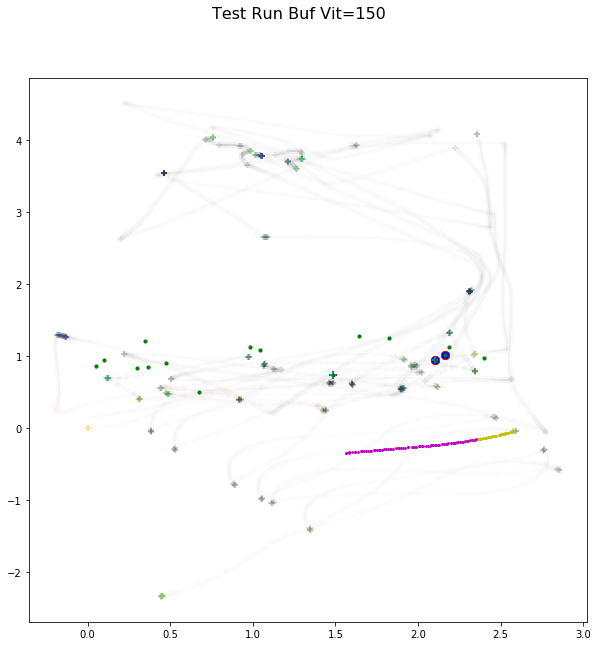

In [15]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='m',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [16]:



buf_vit=60
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

3074
0.0 0.0


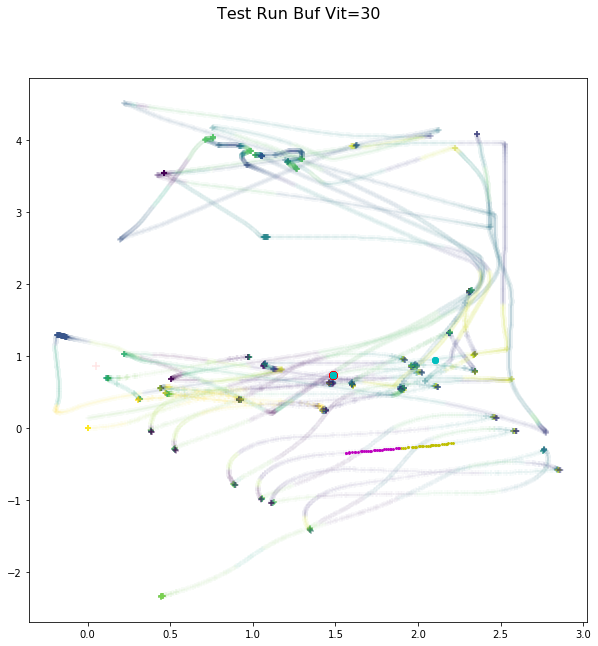

In [17]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



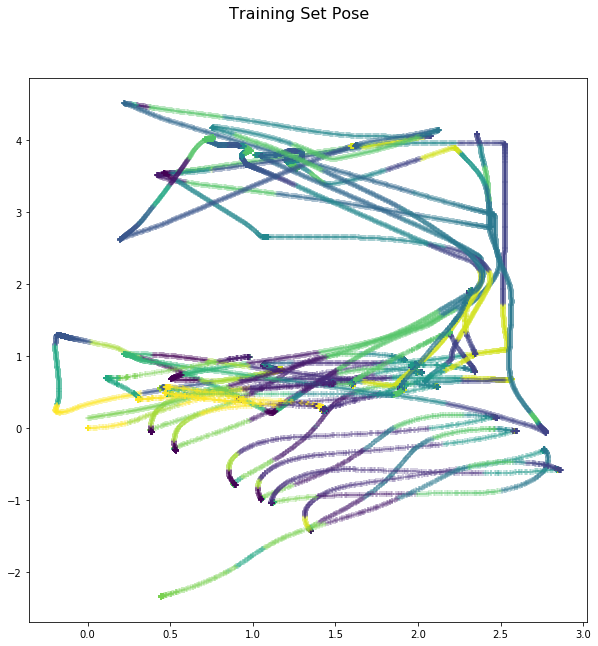

In [18]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.3)


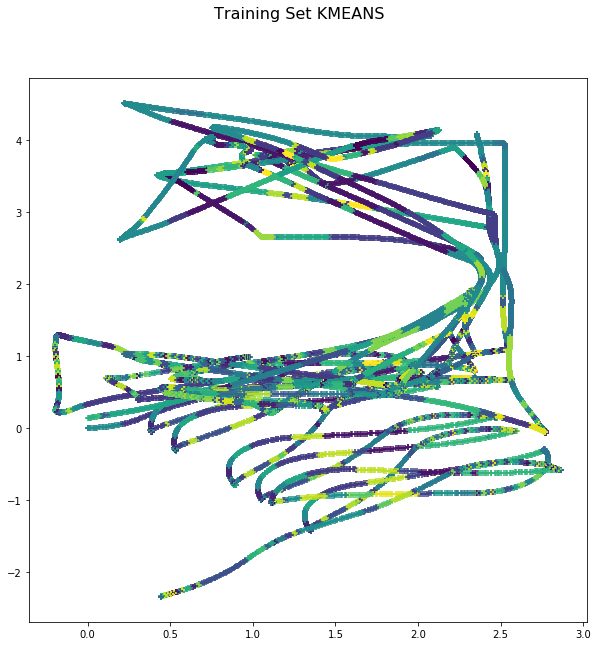

In [19]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk)


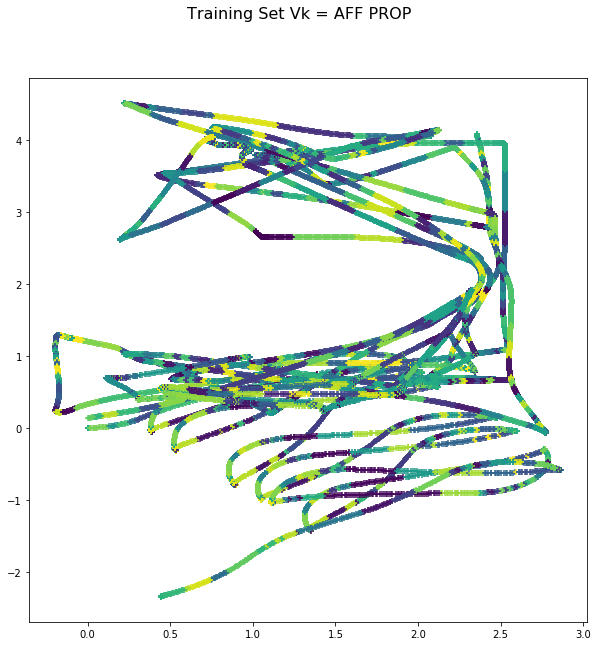

In [20]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Vk = AFF PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff)


In [21]:
graphe= Markov_A_2_grafo(A,ccxyth)
ruta=dijkstra(0,6,graphe)


RUTA CALCULADA 


In [22]:

def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


In [23]:
graphe= Markov_A_2_grafo(A,ccxyth)


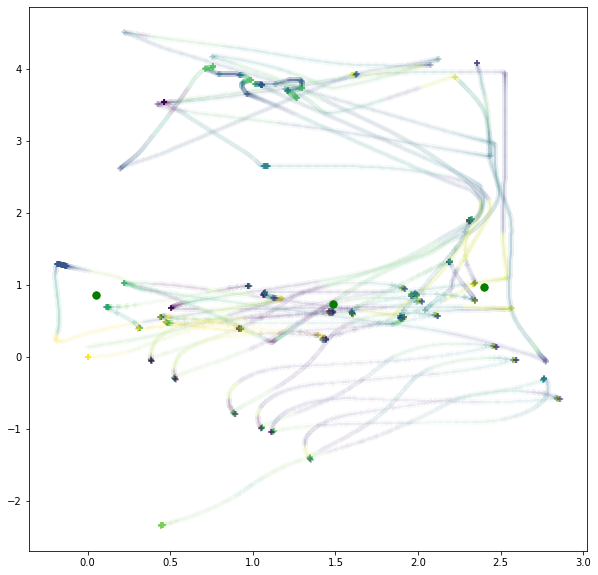

In [24]:
#ruta.append(nodofinal)
path=np.array(ruta)
path
cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)

cords_path2= path_to_xy(path,cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52 )


In [25]:

def dijkstra(nodoinicial,nodofinal,graphe):
    if (nodofinal > graphe.nodos.shape[0]):
        print ('Wrong dimensions for requested node')
        return None

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


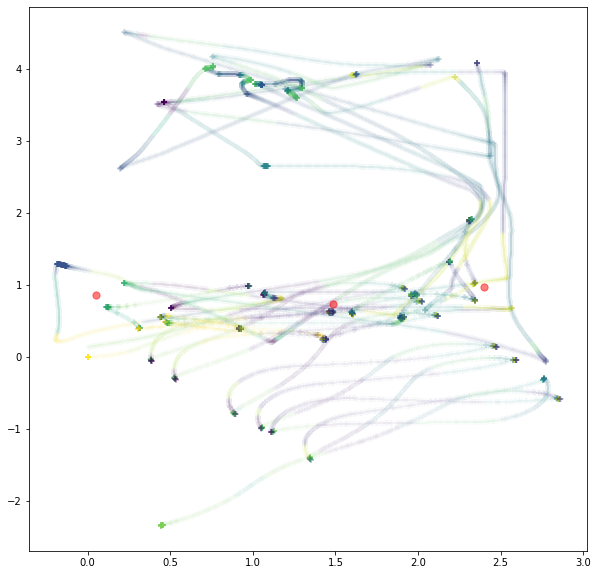

In [26]:
path=np.array(ruta)


cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)
#cords_path2= path_to_xy(path[int(len(path)/2):],cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
#ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52,alpha=.5 )

In [27]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 121)

121


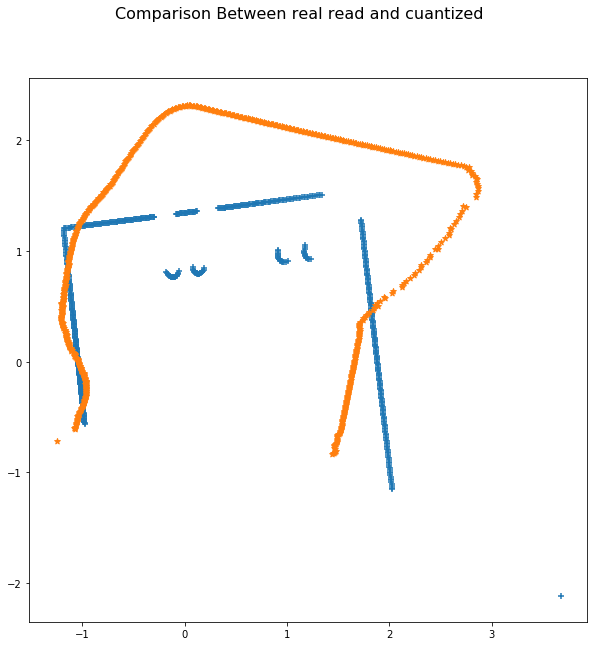

In [28]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [29]:
lecs=data[data.Vk==lec_leida]
lecs.shape

(1749, 727)

In [30]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

121


121


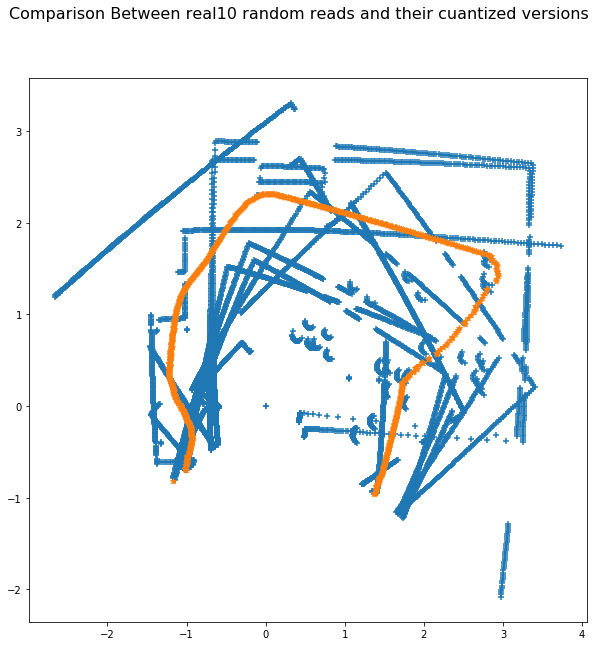

In [31]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [32]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())


 
lec_deseada=aux.index[4]   ###CHOOSING 5th MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 142)

142


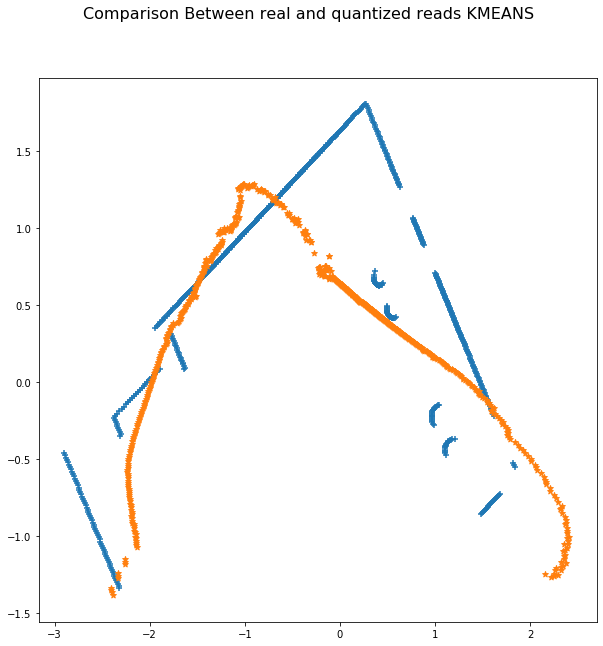

In [33]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real and quantized reads KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [34]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

142


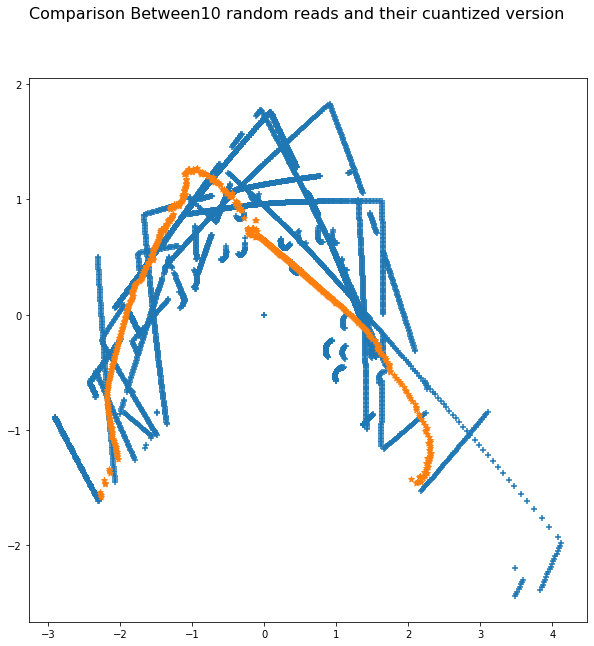

In [35]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between10 random reads and their cuantized version ' , fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [36]:
############################################################################################


In [37]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 195)

COMPARING AFF PROP READINGS NO centroid
195


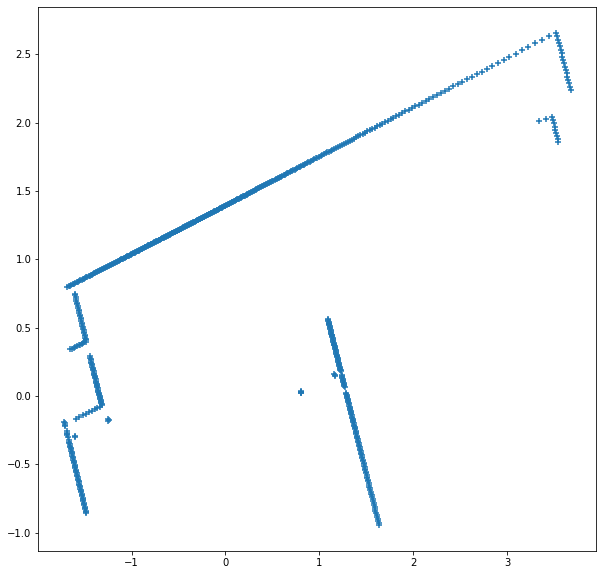

In [38]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [39]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

195


195


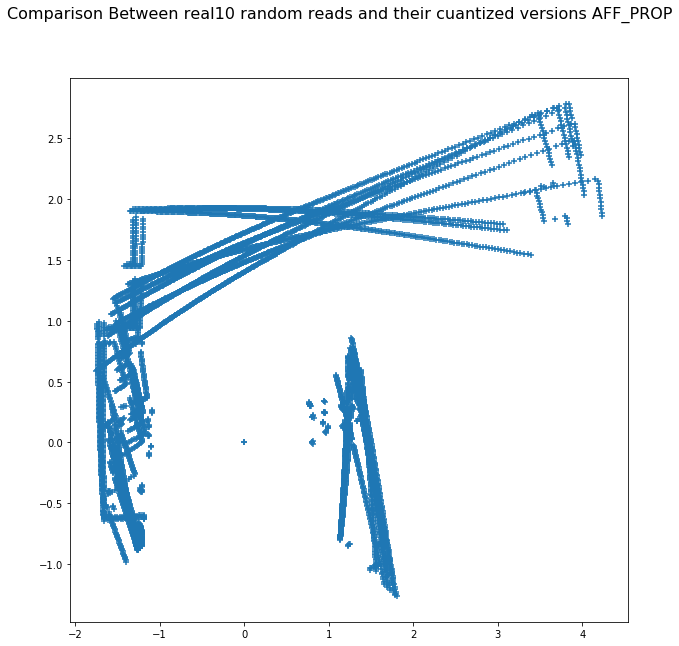

In [40]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

In [41]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[3]   ###CHOOSING 3rd MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 8)

COMPARING AFF PROP READINGS NO centroid
8


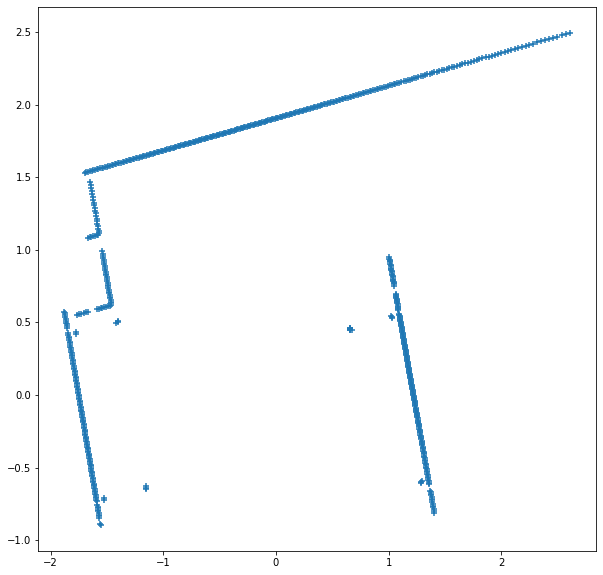

In [42]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [43]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

8


8


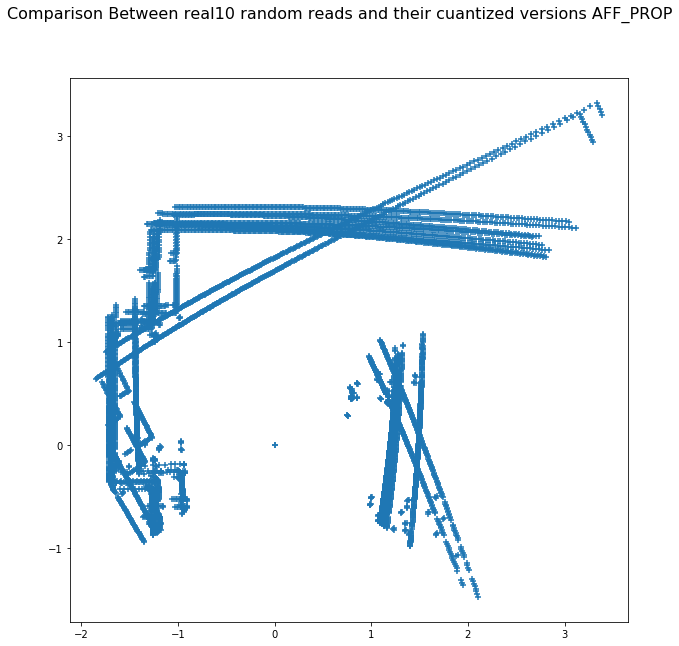

In [44]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

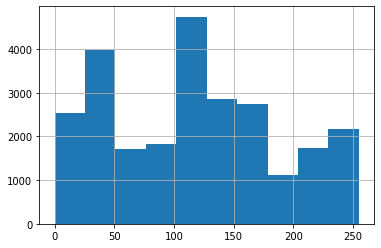

In [45]:
data.Vk.hist()

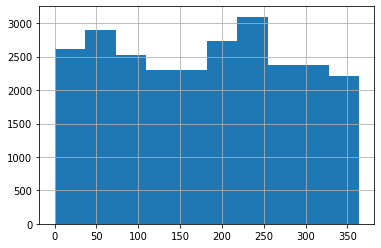

In [46]:
data.Vk_aff.hist()

(<matplotlib.collections.PathCollection at 0x7ff41117add8>,
                  x            y      Vk            Y
 count  1749.000000  1749.000000  1749.0  1749.000000
 mean      1.355336     2.861660   121.0     7.488279
 std       0.897744     1.314370     0.0     4.323120
 min      -0.066280     0.000134   121.0     1.000000
 25%       0.686193     2.000734   121.0     4.000000
 50%       1.258256     2.852222   121.0     7.000000
 75%       2.311660     4.023729   121.0    11.000000
 max       2.526247     4.515830   121.0    15.000000)

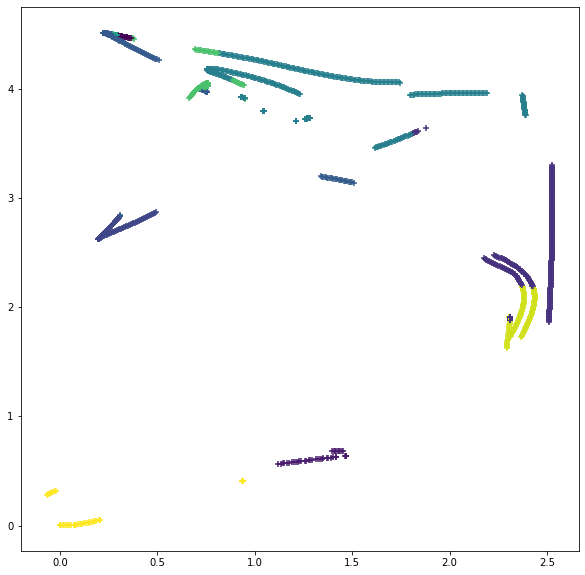

In [47]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','Vk','Y']][data.Vk==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7ff41edf0a58>,
                  x            y        theta           Vk            Y
 count  4235.000000  4235.000000  4235.000000  4235.000000  4235.000000
 mean      1.346621     2.561778     0.073622    76.070838     7.450767
 std       0.747108     1.469588     1.732513    37.707319     4.180236
 min      -0.123052    -0.950010    -3.141142    43.000000     1.000000
 25%       0.822643     1.258662    -1.291241    43.000000     4.000000
 50%       1.246969     2.909066     0.216354    46.000000     6.000000
 75%       2.037375     3.816038     1.499742   121.000000    11.000000
 max       2.526247     4.515830     3.140682   121.000000    15.000000)

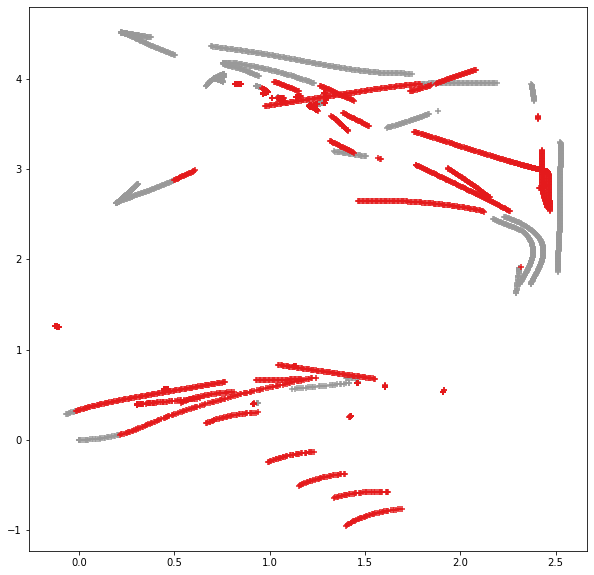

In [48]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','theta','Vk','Y']][data.Vk==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk,marker='+',cmap='Set1'),xy.describe()

(<matplotlib.collections.PathCollection at 0x7ff41edda3c8>,
                 x           y  Vk_aff           Y
 count  367.000000  367.000000   367.0  367.000000
 mean     1.543673    0.338027   195.0    3.321526
 std      0.338935    0.444227     0.0    3.221368
 min      0.865068   -0.681996   195.0    2.000000
 25%      1.293985    0.296499   195.0    2.000000
 50%      1.537587    0.519155   195.0    2.000000
 75%      1.742819    0.636659   195.0    2.000000
 max      2.841506    0.963933   195.0   15.000000)

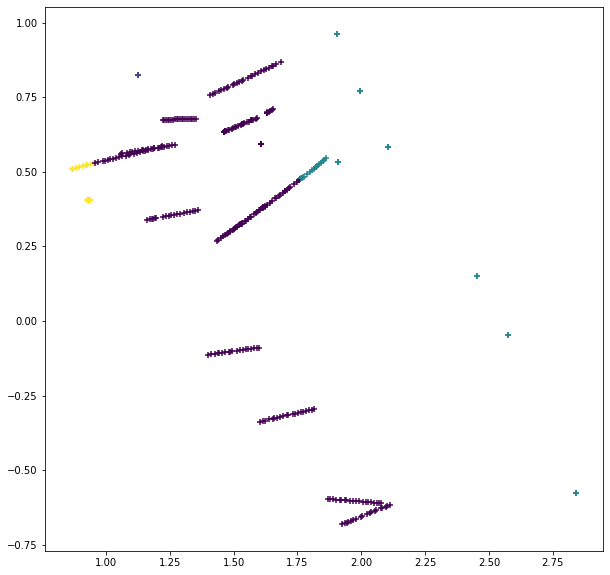

In [49]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','Vk_aff','Y']][data.Vk_aff==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7ff41ecc2a20>,
                 x           y       theta      Vk_aff           Y
 count  980.000000  980.000000  980.000000  980.000000  980.000000
 mean     1.560197    1.018633   -0.572392  147.678571    5.603061
 std      0.455021    1.551242    1.342886   88.260304    4.605875
 min      0.124015   -1.457979   -2.973038   20.000000    1.000000
 25%      1.316645    0.145600   -2.292055   20.000000    2.000000
 50%      1.604825    0.573240    0.136101  195.000000    4.000000
 75%      1.829356    1.022075    0.611573  223.000000   11.000000
 max      2.841506    3.953994    0.869202  223.000000   15.000000)

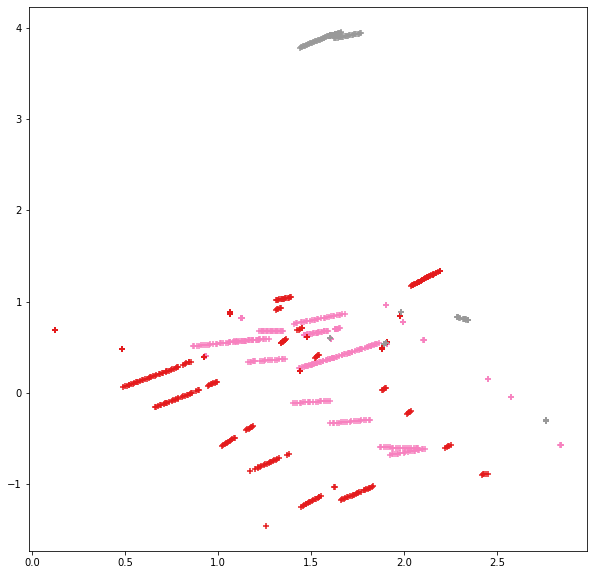

In [50]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk_aff,marker='+',cmap='Set1'),xy.describe()

In [51]:
aux=pd.DataFrame(data.Vk.value_counts())
cents=[]
for i in aux.index[:3]:
    print (data[data.Vk==i][['x','y','theta']].describe())
    cents.append(data[data.Vk==i][['x','y','theta']].mean(axis=0))

aux=pd.DataFrame(data.Vk_aff.value_counts())
cents_aff=[]
for i in aux.index[:3]:
    print (data[data.Vk_aff==i][['x','y','theta']].describe())
    cents_aff.append(data[data.Vk_aff==i][['x','y','theta']].mean(axis=0))

                 x            y        theta
count  1749.000000  1749.000000  1749.000000
mean      1.355336     2.861660     0.951000
std       0.897744     1.314370     1.633987
min      -0.066280     0.000134    -3.136631
25%       0.686193     2.000734     0.001638
50%       1.258256     2.852222     1.500372
75%       2.311660     4.023729     2.324789
max       2.526247     4.515830     3.140682
                 x            y        theta
count  1275.000000  1275.000000  1275.000000
mean      1.126477     2.391085    -0.919960
std       0.431641     1.632285     1.684379
min      -0.015355    -0.806939    -3.141142
25%       0.975580     0.528811    -2.621959
50%       1.210644     3.548206    -0.827781
75%       1.403122     3.792502     0.447996
max       2.410299     3.970752     3.138962
                 x            y        theta
count  1211.000000  1211.000000  1211.000000
mean      1.565812     2.308385    -0.147451
std       0.702438     1.425201     1.207078
min      -

In [52]:
cents_aff=np.asarray(cents_aff)

In [53]:
cents_aff

array([[ 1.54367293,  0.33802683,  0.34584797],
       [ 1.3374739 ,  0.13895036, -2.45761452],
       [ 1.81278566,  2.76904387,  0.27121103]])

In [54]:
cents

[x        1.355336
 y        2.861660
 theta    0.951000
 dtype: float64,
 x        1.126477
 y        2.391085
 theta   -0.919960
 dtype: float64,
 x        1.565812
 y        2.308385
 theta   -0.147451
 dtype: float64]